<a href="https://colab.research.google.com/github/leulged/tanzania-tourism-prediction-zindi/blob/main/bootcamp_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Missing Values Visualization – Tanzania Tourism Dataset

## 🎯 Task:
Visualize the proportion of missing values for each feature using a bar chart.

### 🧪 Experimental Questions:
- Which features have the highest proportion of missing values, and how might this affect the reliability of our analysis?
- Are the missing values random, or do they show a pattern related to specific types of visitors or variables?


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/sample_data/Train (1).csv')
df.head()


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [ ]:
# Calculate proportion of missing values for each column
missing_percent = df.isnull().mean().sort_values(ascending=False)

# Filter only columns with missing data
missing_percent = missing_percent[missing_percent > 0]

# Display the proportions
missing_percent


,0
travel_with,0.231649
most_impressing,0.065086
total_male,0.001040
total_female,0.000624


<ipython-input-4-9a5042be66e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


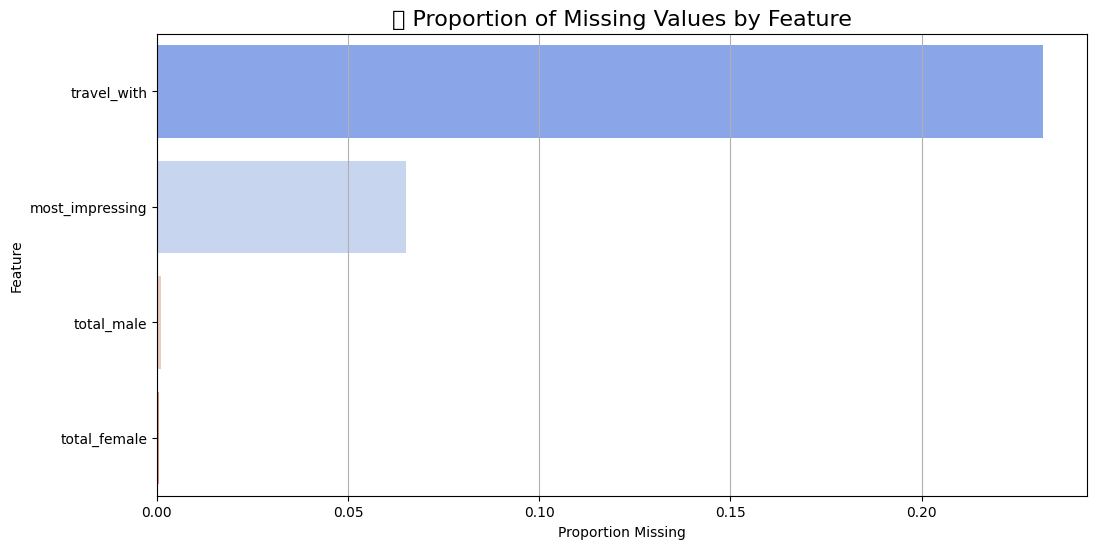

In [ ]:
# Set plot style
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='coolwarm')

# Add labels and title
plt.title('🔍 Proportion of Missing Values by Feature', fontsize=16)
plt.xlabel('Proportion Missing')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()


## 📊 2. Categorical Feature Distribution

### 🎯 Task:
Visualize the distribution of values for each categorical variable using bar charts alongside the target variable.

### 🧪 Experimental Questions:
- What are the most common categories in each variable (e.g., who do tourists most often travel with? What is the most common purpose of visit)?
- Are there any categories that are underrepresented or surprisingly dominant?
- Are any features heavily imbalanced, possibly requiring re-grouping or adjustment in future modeling?


In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Preview the list
categorical_cols


['ID',
 'country',
 'age_group',
 'travel_with',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'payment_mode',
 'first_trip_tz',
 'most_impressing']

### 🧍 Travel Companions – Who do tourists most often travel with?

We visualize how tourists travel: alone, with spouse, family, or friends.


<ipython-input-6-fe5462001236>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='travel_with', order=df['travel_with'].value_counts().index, palette='Set2')


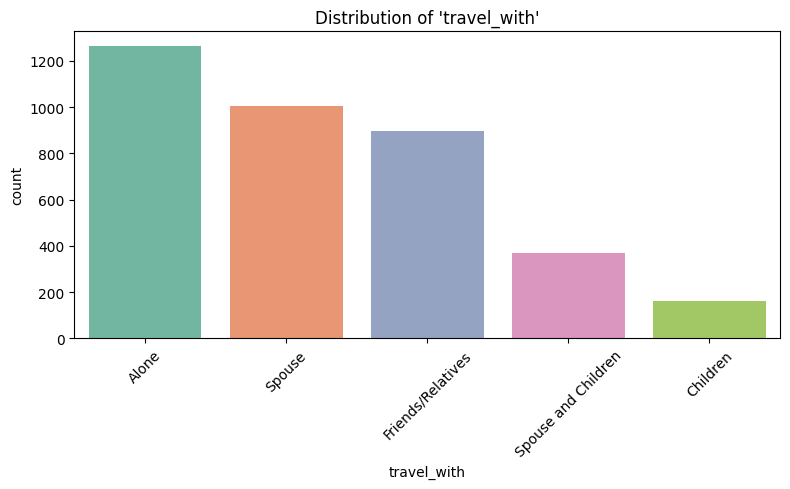

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='travel_with', order=df['travel_with'].value_counts().index, palette='Set2')
plt.title("Distribution of 'travel_with'")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-7-93800f2c3af4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='travel_with', y='total_cost', palette='Set2')


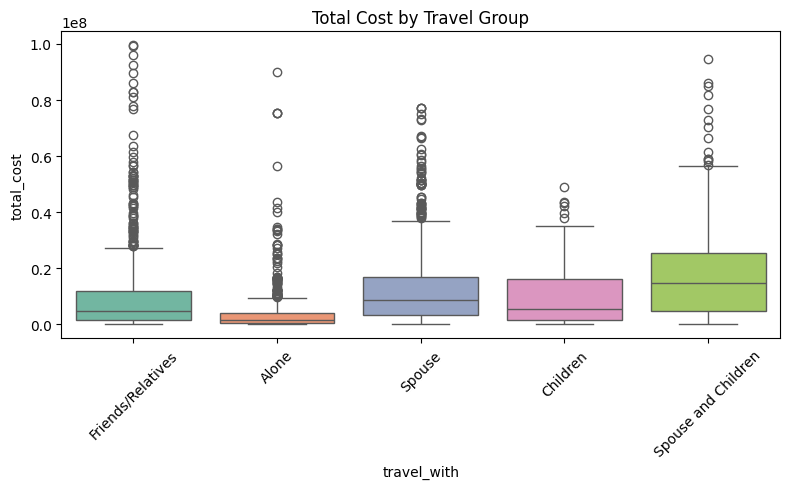

In [ ]:
# How cost varies across groups
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='travel_with', y='total_cost', palette='Set2')
plt.title("Total Cost by Travel Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🧭 Purpose of Visit – Why do tourists come to Tanzania?

We explore the most common purposes, and how they relate to spending.


<ipython-input-8-8050e34d1685>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='purpose', order=df['purpose'].value_counts().index, palette='Set3')


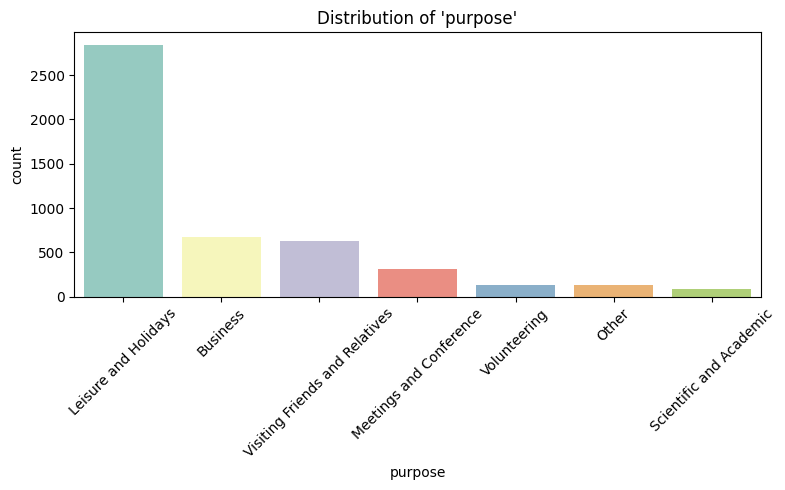

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='purpose', order=df['purpose'].value_counts().index, palette='Set3')
plt.title("Distribution of 'purpose'")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-9-02a2ded204c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='purpose', y='total_cost', palette='Set3')


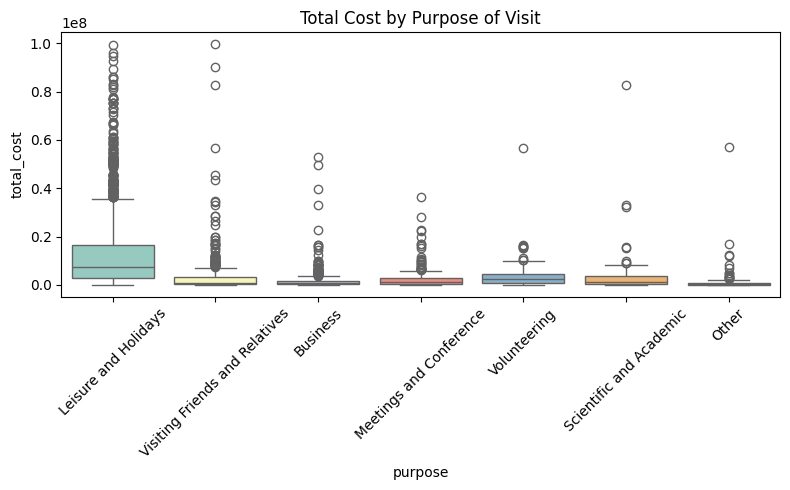

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='purpose', y='total_cost', palette='Set3')
plt.title("Total Cost by Purpose of Visit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 💳 Payment Methods – How do tourists pay?

Visualizing payment preferences: cash vs digital methods.


<ipython-input-10-096394e3bbe2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='payment_mode', palette='coolwarm')


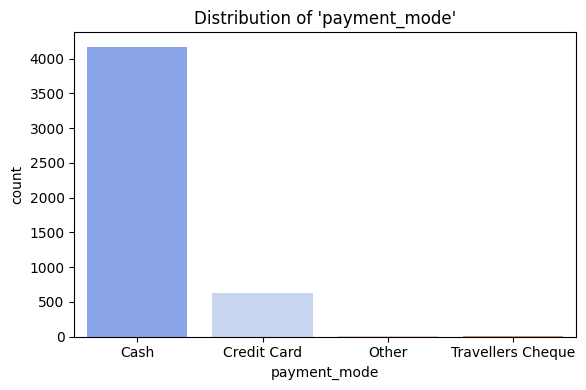

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='payment_mode', palette='coolwarm')
plt.title("Distribution of 'payment_mode'")
plt.tight_layout()
plt.show()


### 🐘 Main Activity – What do tourists do in Tanzania?

This shows which experiences are most popular.


<ipython-input-12-bc96ea49a0ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='main_activity', order=df['main_activity'].value_counts().index, palette='Paired')


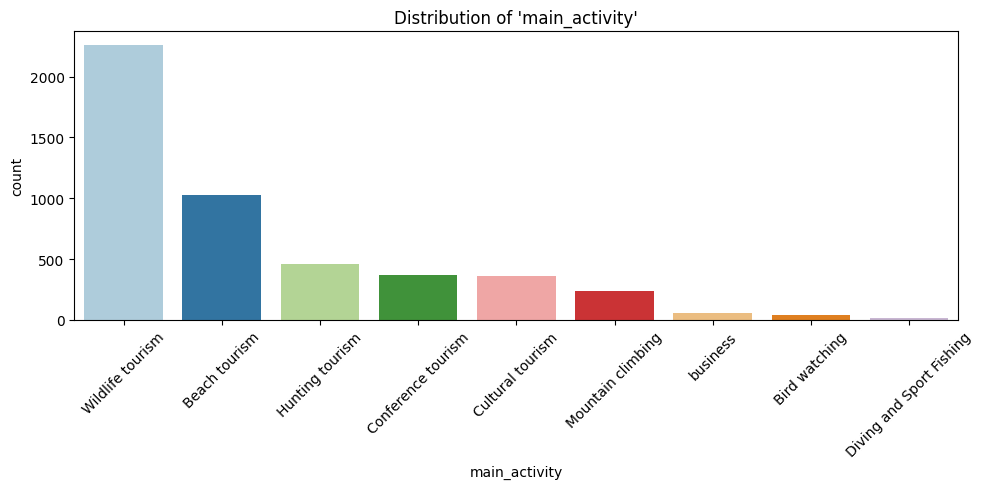

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='main_activity', order=df['main_activity'].value_counts().index, palette='Paired')
plt.title("Distribution of 'main_activity'")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🧳 Tour Arrangement – Independent vs Package Tours

Understanding how tourists organize their trips.


<ipython-input-13-5c11b6f77fb8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='tour_arrangement', palette='Blues')


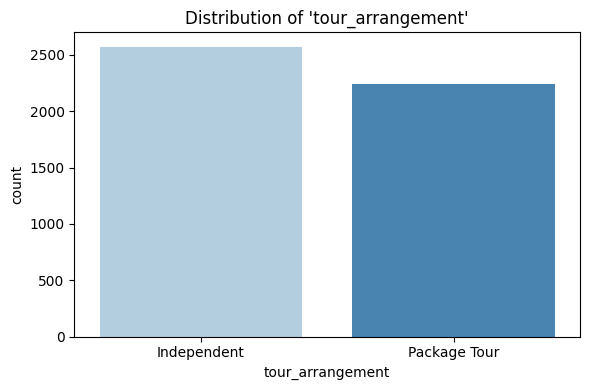

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='tour_arrangement', palette='Blues')
plt.title("Distribution of 'tour_arrangement'")
plt.tight_layout()
plt.show()


### 📣 Information Sources – Where do tourists hear about Tanzania?

Showing how tourism is influenced by information sources.


<ipython-input-15-eeda04f2b9fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='info_source', order=df['info_source'].value_counts().index, palette='Spectral')


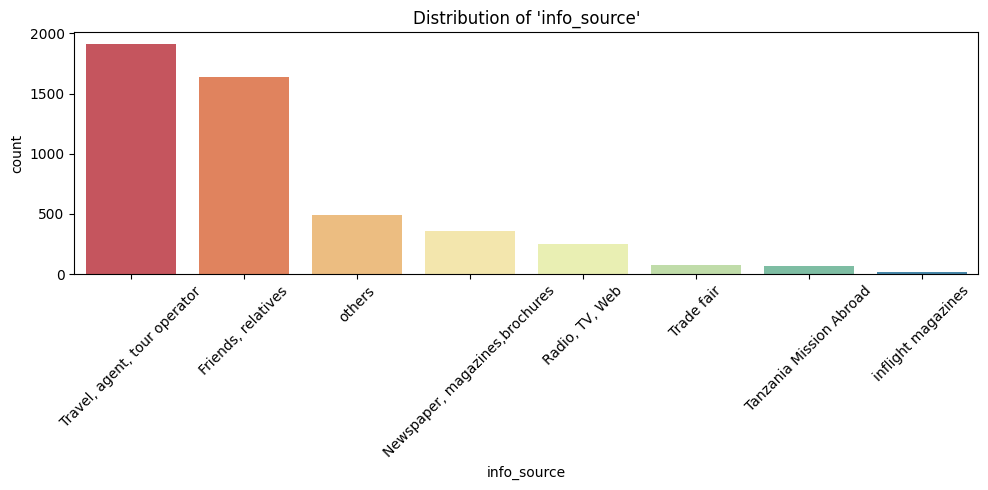

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='info_source', order=df['info_source'].value_counts().index, palette='Spectral')
plt.title("Distribution of 'info_source'")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🧪 Are there any categories that are underrepresented or surprisingly dominant?

Yes, clear imbalances exist across several categorical variables:

- **Travel With**:
  - **Dominant**: Most tourists travel **Alone**, highlighting a strong preference for solo or independent travel.
  - **Underrepresented**: Traveling with **Children** is rare, suggesting that family trips involving young children are less common.

- **Purpose**:
  - **Dominant**: **Leisure and Holidays** overwhelmingly dominate as the main reason for visiting Tanzania.
  - **Underrepresented**: **Specific** (special purposes) and **Academic** (education-related) visits are very rare.

- **Main Activity**:
  - **Dominant**: **Wildlife Tourism** is by far the most popular activity among tourists, aligned with Tanzania's global reputation for safaris and natural reserves.
  - **Underrepresented**: **Diving** activities are very rare, indicating that marine tourism is a much smaller niche compared to land-based adventures.

➡️ These imbalances suggest potential areas for targeted marketing strategies, such as promoting family-friendly travel packages or diversifying tourism activities beyond wildlife safaris.


### 🧪 Are any features heavily imbalanced, possibly requiring re-grouping or adjustment in future modeling?

Yes, several features show strong imbalance that could affect modeling:

- **Travel With**:
  - **Dominant**: Tourists traveling **Alone** are much more common than those traveling with children or in groups.
  - ⚡ Re-grouping suggestion: Combine smaller categories like "Children" and "Spouse" into a broader group (e.g., "Family") to balance class distribution.

- **Purpose**:
  - **Dominant**: **Leisure and Holidays** is the main purpose for the majority of tourists, while **Specific** and **Academic** purposes are very rare.
  - ⚡ Re-grouping suggestion: Merge underrepresented purposes into a single "Other" or "Special Visit" category.

- **Main Activity**:
  - **Dominant**: **Wildlife tourism** heavily dominates over other activities like Diving or City tourism.
  - ⚡ Re-grouping suggestion: Group less frequent activities into a general "Other Activities" category to ensure better model generalization.

➡️ **Why re-group?**  
Heavily imbalanced features can cause machine learning models to overfit on dominant classes and ignore minority ones. Re-grouping helps to create more balanced and robust models.


## 📋 3. Descriptive Statistics for Categorical Features

### 🎯 Task:
Generate a statistical summary for all categorical features using the `.describe()` method.

### 🧪 Experimental Questions:
- What is the most frequently occurring category in each feature, and what might this indicate about tourist behavior?
- Do certain features show high or low diversity in values (e.g., many unique values vs. few repeated ones)?
- Are there features where the top category dominates disproportionately?


In [ ]:
# Select only categorical columns
categorical_cols = df.select_dtypes(include='object')

# Get descriptive statistics
categorical_summary = categorical_cols.describe().T
categorical_summary


,count,unique,top,freq
ID,4809,4809,tour_999,1
country,4809,105,UNITED STATES OF AMERICA,695
age_group,4809,4,25-44,2487
travel_with,3695,5,Alone,1265
purpose,4809,7,Leisure and Holidays,2840
main_activity,4809,9,Wildlife tourism,2259
info_source,4809,8,"Travel, agent, tour operator",1913
tour_arrangement,4809,2,Independent,2570
package_transport_int,4809,2,No,3357
package_accomodation,4809,2,No,2602


# 📋 Descriptive Statistics for Categorical Features – Answers

---

### 🧪 1. What is the most frequently occurring category in each feature, and what might this indicate about tourist behavior?

From the descriptive statistics:

- **Country**: Most tourists come from the **United States of America** (695 tourists), suggesting strong inbound travel from the US.
- **Age Group**: The majority of tourists fall into the **25–44** age range (2487 tourists), indicating that middle-aged travelers dominate Tanzanian tourism.
- **Travel With**: Most tourists prefer to travel **Alone** (1265 travelers), showing a tendency toward independent travel experiences.
- **Purpose**: **Leisure and Holidays** (2840 tourists) is by far the leading reason for visits, highlighting Tanzania's appeal as a vacation destination.
- **Main Activity**: **Wildlife tourism** (2259 tourists) dominates activities, reinforcing Tanzania’s global reputation for safaris and nature-based tourism.
- **Info Source**: Most tourists heard about Tanzania through **Travel agents or tour operators** (1913 tourists).
- **Tour Arrangement**: **Independent** travel (2570 tourists) is more common than package tours.
- **Payment Mode**: **Cash** is overwhelmingly preferred (4172 tourists), suggesting limited use of digital or card payments.

➡️ **Tourist Behavior Insight**:  
Tourists visiting Tanzania are typically **young adults (25–44 years)**, **travel independently**, **pay with cash**, **come for leisure**, and **engage primarily in wildlife experiences**.

---

### 🧪 2. Do certain features show high or low diversity in values (e.g., many unique values vs. few repeated ones)?

- **High Diversity**:
  - **Country**: 105 unique countries — tourists come from a wide range of places globally.
  - **Most Impressing**: 7 unique impressions, reflecting diverse opinions about Tanzania's attractions.

- **Low Diversity**:
  - **Tour Arrangement**, **Package Features**, **First Trip to Tanzania** — mostly binary ("Yes" or "No").
  - **Payment Mode**: Only 4 options, with "Cash" dominating.

➡️ **Interpretation**:  
Some features like **country** provide rich diversity, while others like **tour arrangement** and **package preferences** are **simple and low-variance**.

---

### 🧪 3. Are there features where the top category dominates disproportionately?

Yes, strong dominance is observed in several features:

- **Payment Mode**: **Cash** accounts for ~87% of all payment modes.
- **Purpose**: **Leisure and Holidays** makes up nearly 60% of all trips.
- **Main Activity**: **Wildlife tourism** significantly dominates other activities.
- **Tour Arrangement**: **Independent** travel is much more common than Package Tours.
- **Package Features**: "No" responses dominate for transport, food, sightseeing, and insurance.

➡️ **Impact on Modeling**:  
These imbalances suggest that some features may need **re-grouping** or **special treatment** to avoid bias toward dominant classes during machine learning modeling.

---


## 📦 4. Boxplot of Total Cost by Age Group and Categorical Variables

### 🎯 Task:
Create boxplots to analyze how `total_cost` varies by `age_group` across the following variables:

- `travel_with`
- `purpose`
- `info_source`
- `payment_mode`
- `main_activity`

### 🧪 Experimental Questions:
- How does the spending behavior vary across different age groups?
- Do certain travel companions (e.g., traveling alone vs. with family) influence cost significantly within each age group?
- Are specific purposes of travel (e.g., leisure vs. business) associated with higher spending, and does this vary by age?
- Do the sources of travel information or payment methods correlate with higher or lower costs?
- Which main tourism activities are associated with the highest spending, and are younger or older tourists more likely to engage in them?


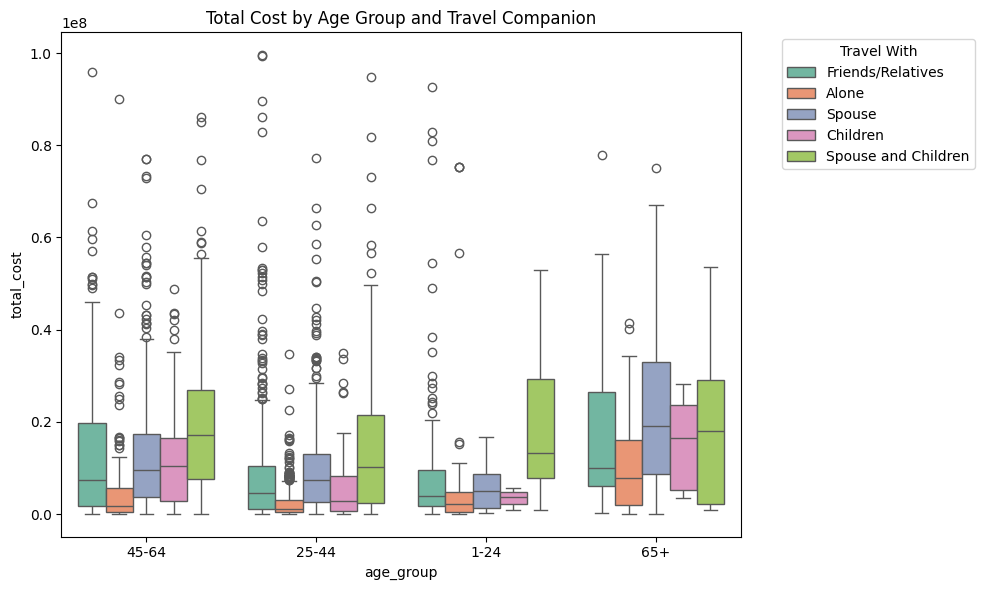

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="age_group", y="total_cost", hue="travel_with", palette="Set2")
plt.title("Total Cost by Age Group and Travel Companion")
plt.xticks(rotation=0)
plt.legend(title='Travel With', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


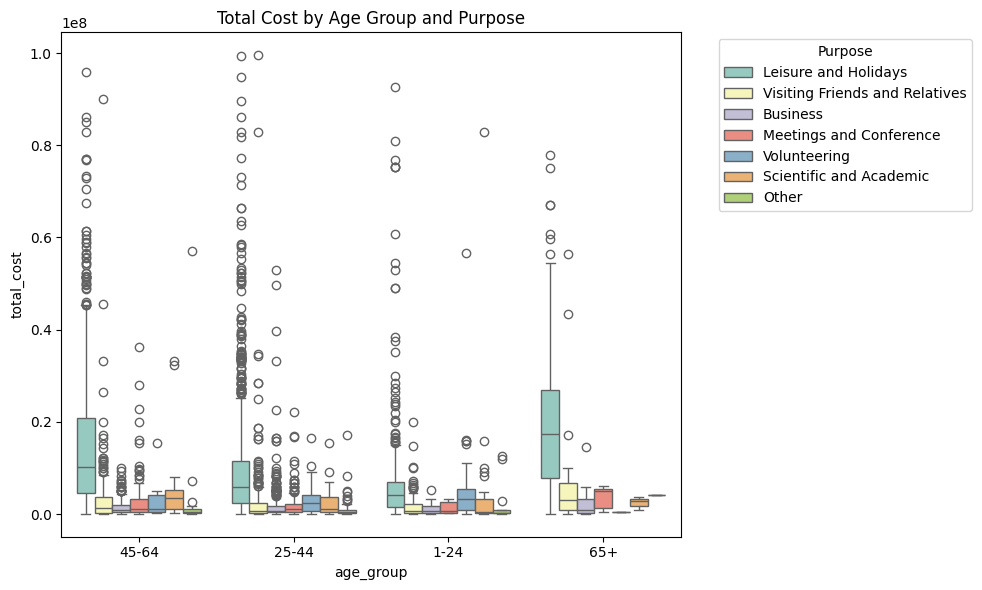

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="age_group", y="total_cost", hue="purpose", palette="Set3")
plt.title("Total Cost by Age Group and Purpose")
plt.xticks(rotation=0)
plt.legend(title='Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


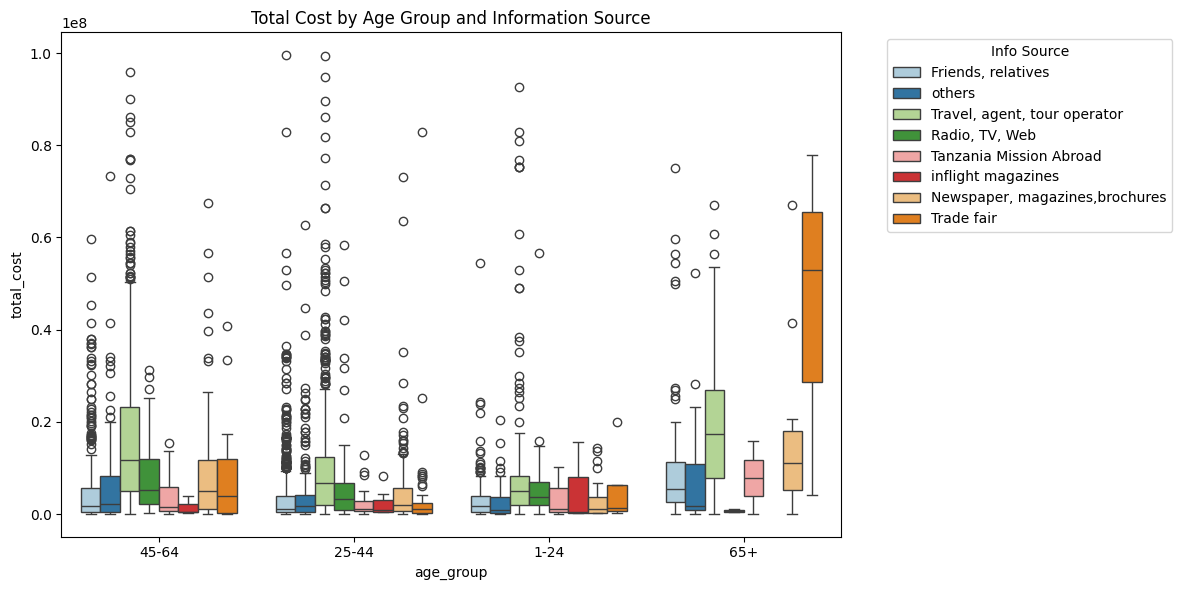

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="age_group", y="total_cost", hue="info_source", palette="Paired")
plt.title("Total Cost by Age Group and Information Source")
plt.xticks(rotation=0)
plt.legend(title='Info Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


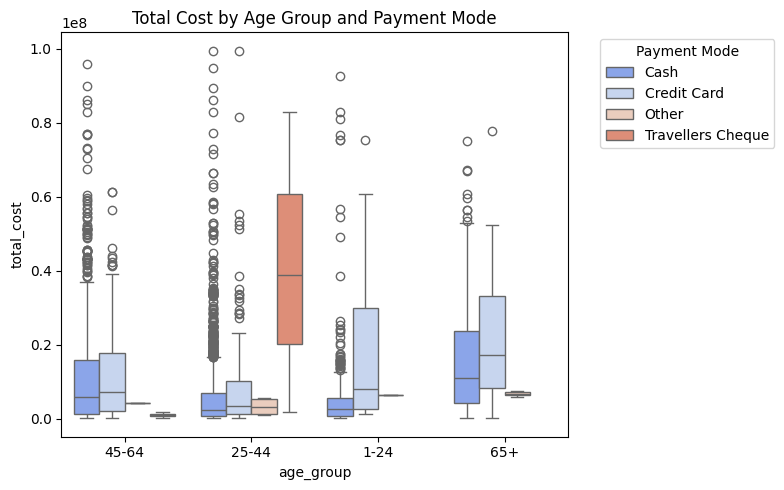

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="age_group", y="total_cost", hue="payment_mode", palette="coolwarm")
plt.title("Total Cost by Age Group and Payment Mode")
plt.xticks(rotation=0)
plt.legend(title='Payment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


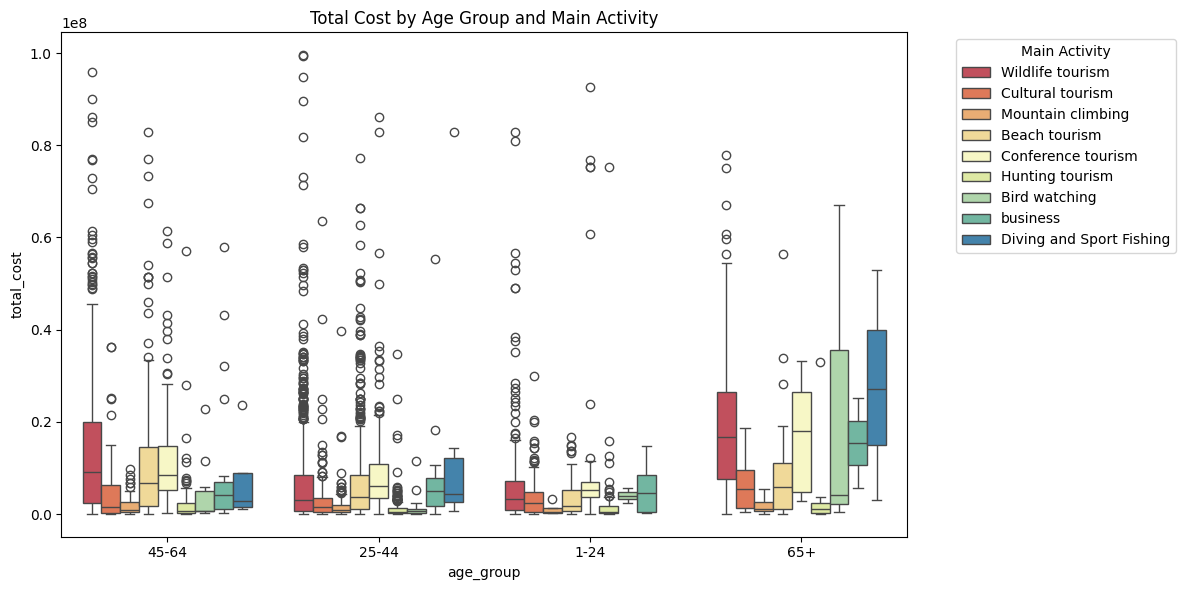

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="age_group", y="total_cost", hue="main_activity", palette="Spectral")
plt.title("Total Cost by Age Group and Main Activity")
plt.xticks(rotation=0)
plt.legend(title='Main Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 🌍 Subset Analysis: Ethiopian Tourists

### 🎯 Task:
Filter the dataset to focus on tourists from **Ethiopia** and perform exploratory data analysis specific to this subgroup.

### 🧪 Experimental Questions:
- What are the most common age groups, travel companions, and purposes of visit among Ethiopian tourists?
- How does the spending pattern of Ethiopian tourists compare to the overall dataset?
- Are there notable differences in the preferred activities or payment methods for Ethiopian tourists?
- Does this group show any unique trends or behaviors that may inform targeted marketing or tourism policy?


In [ ]:
# Filter dataset for Ethiopian tourists
ethiopia_df = df[df["country"] == "ETHIOPIA"]
ethiopia_df.shape


(6, 23)

<ipython-input-23-2ac4dff7c82c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ethiopia_df, x='age_group', order=ethiopia_df['age_group'].value_counts().index, palette='Set2')


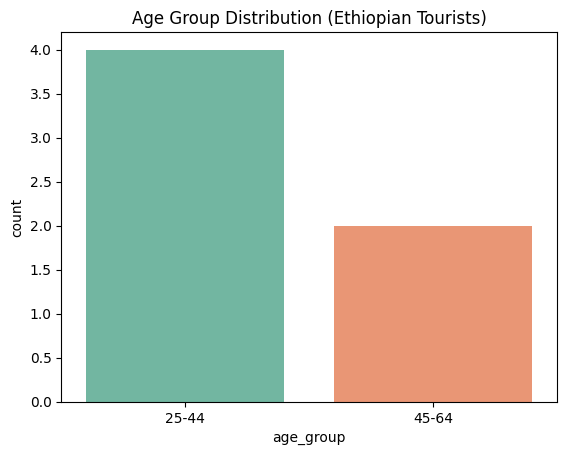

<ipython-input-23-2ac4dff7c82c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ethiopia_df, x='travel_with', order=ethiopia_df['travel_with'].value_counts().index, palette='Set3')


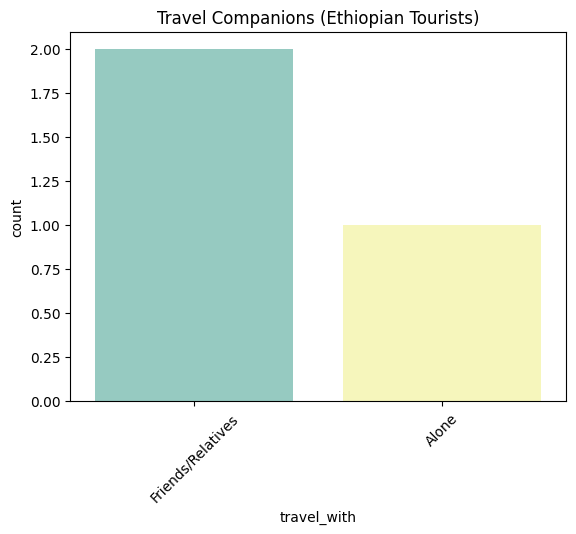

<ipython-input-23-2ac4dff7c82c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ethiopia_df, x='purpose', order=ethiopia_df['purpose'].value_counts().index, palette='Set1')


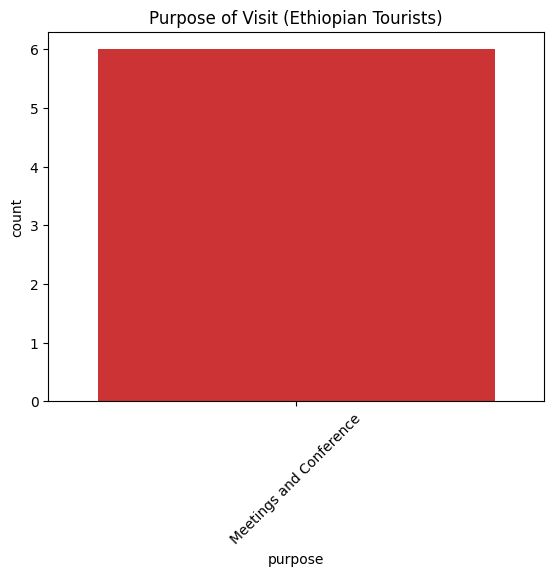

In [ ]:
# Age Group
sns.countplot(data=ethiopia_df, x='age_group', order=ethiopia_df['age_group'].value_counts().index, palette='Set2')
plt.title("Age Group Distribution (Ethiopian Tourists)")
plt.show()

# Travel With
sns.countplot(data=ethiopia_df, x='travel_with', order=ethiopia_df['travel_with'].value_counts().index, palette='Set3')
plt.title("Travel Companions (Ethiopian Tourists)")
plt.xticks(rotation=45)
plt.show()

# Purpose
sns.countplot(data=ethiopia_df, x='purpose', order=ethiopia_df['purpose'].value_counts().index, palette='Set1')
plt.title("Purpose of Visit (Ethiopian Tourists)")
plt.xticks(rotation=45)
plt.show()


<ipython-input-24-3e079b6cfc25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x="is_ethiopian", y="total_cost", palette="coolwarm")


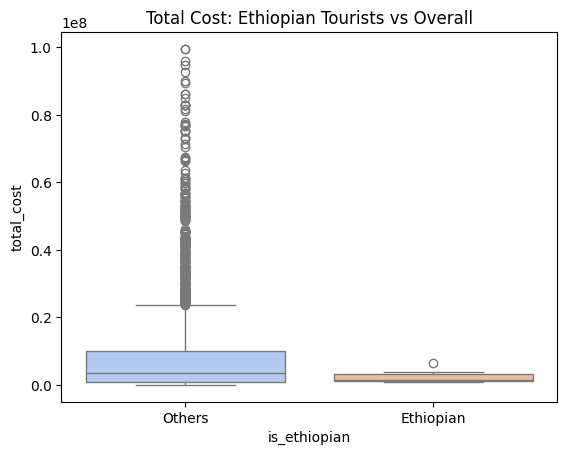

In [ ]:
# Spending comparison boxplot
combined = df.copy()
combined["is_ethiopian"] = df["country"] == "ETHIOPIA"

sns.boxplot(data=combined, x="is_ethiopian", y="total_cost", palette="coolwarm")
plt.title("Total Cost: Ethiopian Tourists vs Overall")
plt.xticks([0, 1], ["Others", "Ethiopian"])
plt.show()


<ipython-input-25-27917d14f4f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ethiopia_df, x='main_activity', order=ethiopia_df['main_activity'].value_counts().index, palette='viridis')


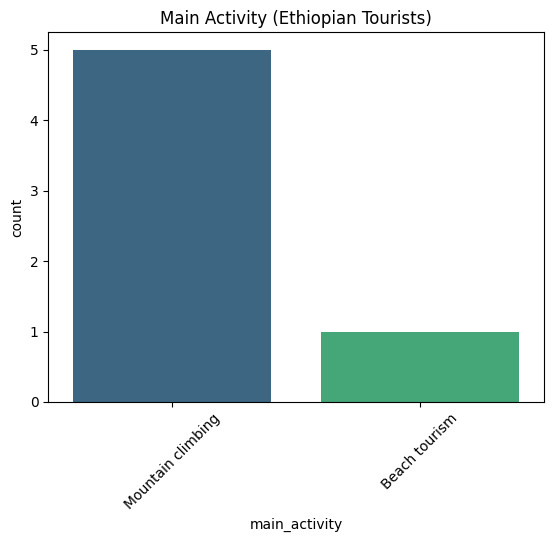

<ipython-input-25-27917d14f4f1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ethiopia_df, x='payment_mode', order=ethiopia_df['payment_mode'].value_counts().index, palette='rocket')


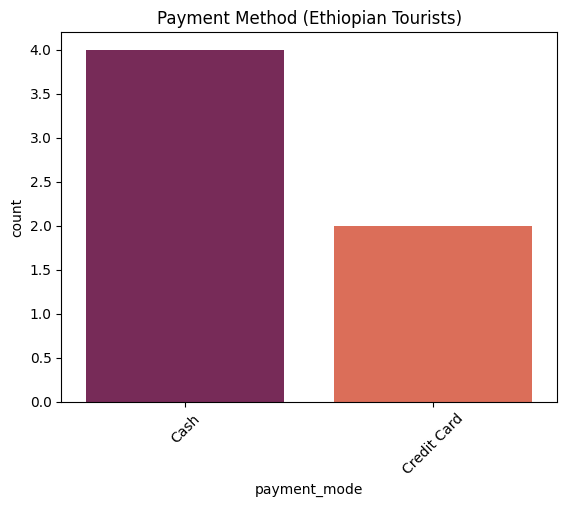

In [ ]:
# Main Activity
sns.countplot(data=ethiopia_df, x='main_activity', order=ethiopia_df['main_activity'].value_counts().index, palette='viridis')
plt.title("Main Activity (Ethiopian Tourists)")
plt.xticks(rotation=45)
plt.show()

# Payment Method
sns.countplot(data=ethiopia_df, x='payment_mode', order=ethiopia_df['payment_mode'].value_counts().index, palette='rocket')
plt.title("Payment Method (Ethiopian Tourists)")
plt.xticks(rotation=45)
plt.show()


#### 4. Unique Trends or Behaviors:
- Most of them **travel between the ages of 25-44**.
- Travel is often done **with friends and relatives**.
- The **purpose of travel** is typically for **meetings and conferences**.
- The **total cost** of the trip tends to be **low**.
- Activities include **mountain climbing**.
- **Payment** is generally made **in cash**.

➡️ These insights can help design **targeted campaigns** and **tailored travel experiences** for this group of travelers!
